In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential

from sklearn.model_selection import KFold
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

CSV_FILE_PATH = "./dataSet.csv"  # path of csv file
DATA_PATH = "./sonidos/" # path to folde


In [2]:
from collections.abc import Sequence
def get_shape(lst, shape=()):
    """
    returns the shape of nested lists similarly to numpy's shape.

    :param lst: the nested list
    :param shape: the shape up to the current recursion depth
    :return: the shape including the current depth
            (finally this will be the full depth)
    """

    if not isinstance(lst, Sequence):
        # base case
        return shape

    # peek ahead and assure all lists in the next depth
    # have the same length
    if isinstance(lst[0], Sequence):
        l = len(lst[0])
        if not all(len(item) == l for item in lst):
            msg = 'not all lists have the same length'
            raise ValueError(msg)

    shape += (len(lst), )
    
    # recurse
    shape = get_shape(lst[0], shape)

    return shape

In [3]:
df = pd.read_csv(CSV_FILE_PATH)
df


,name,target,category
0,aspirador1.wav,1,aspirador
1,aspirador2.wav,1,aspirador
2,aspirador3.wav,1,aspirador
3,aspirador4.wav,1,aspirador
4,aspirador5.wav,1,aspirador
...,...,...,...
1495,timbre96.wav,15,timbre
1496,timbre97.wav,15,timbre
1497,timbre98.wav,15,timbre
1498,timbre99.wav,15,timbre


In [4]:
sample_df = df.drop_duplicates(subset=['target'])
sample_df

,name,target,category
0,aspirador1.wav,1,aspirador
100,cisterna1.wav,2,cisterna
200,conversacion1.wav,3,conversacion
300,cubiertos_sartenes1.wav,4,cubiertos_sartenes
400,despertador1.wav,5,despertador
500,ducha1.wav,6,ducha
600,estractor1.wav,7,estractor
700,grifo_banio1.wav,8,grifo_banio
800,grifo_cocina1.wav,9,grifo_cocina
900,impresora1.wav,10,impresora


0it [00:00, ?it/s]

66150

(128, 130)

1it [00:00,  1.99it/s]

66150

(128, 130)

2it [00:00,  3.60it/s]

66150

(128, 130)

3it [00:00,  4.84it/s]

66150

(128, 130)

4it [00:00,  5.79it/s]

66150

(128, 130)

5it [00:00,  6.58it/s]

66150

(128, 130)

6it [00:01,  7.37it/s]

66150

(128, 130)

7it [00:01,  8.00it/s]

66150

(128, 130)

8it [00:01,  8.43it/s]

66150

(128, 130)

9it [00:01,  8.77it/s]

66150

(128, 130)

10it [00:01,  8.89it/s]

66150

(128, 130)

11it [00:01,  8.81it/s]

66150

(128, 130)

12it [00:01,  8.91it/s]

66150

(128, 130)

13it [00:01,  8.64it/s]

66150

(128, 130)

14it [00:01,  8.63it/s]

66150

(128, 130)

15it [00:02,  7.25it/s]


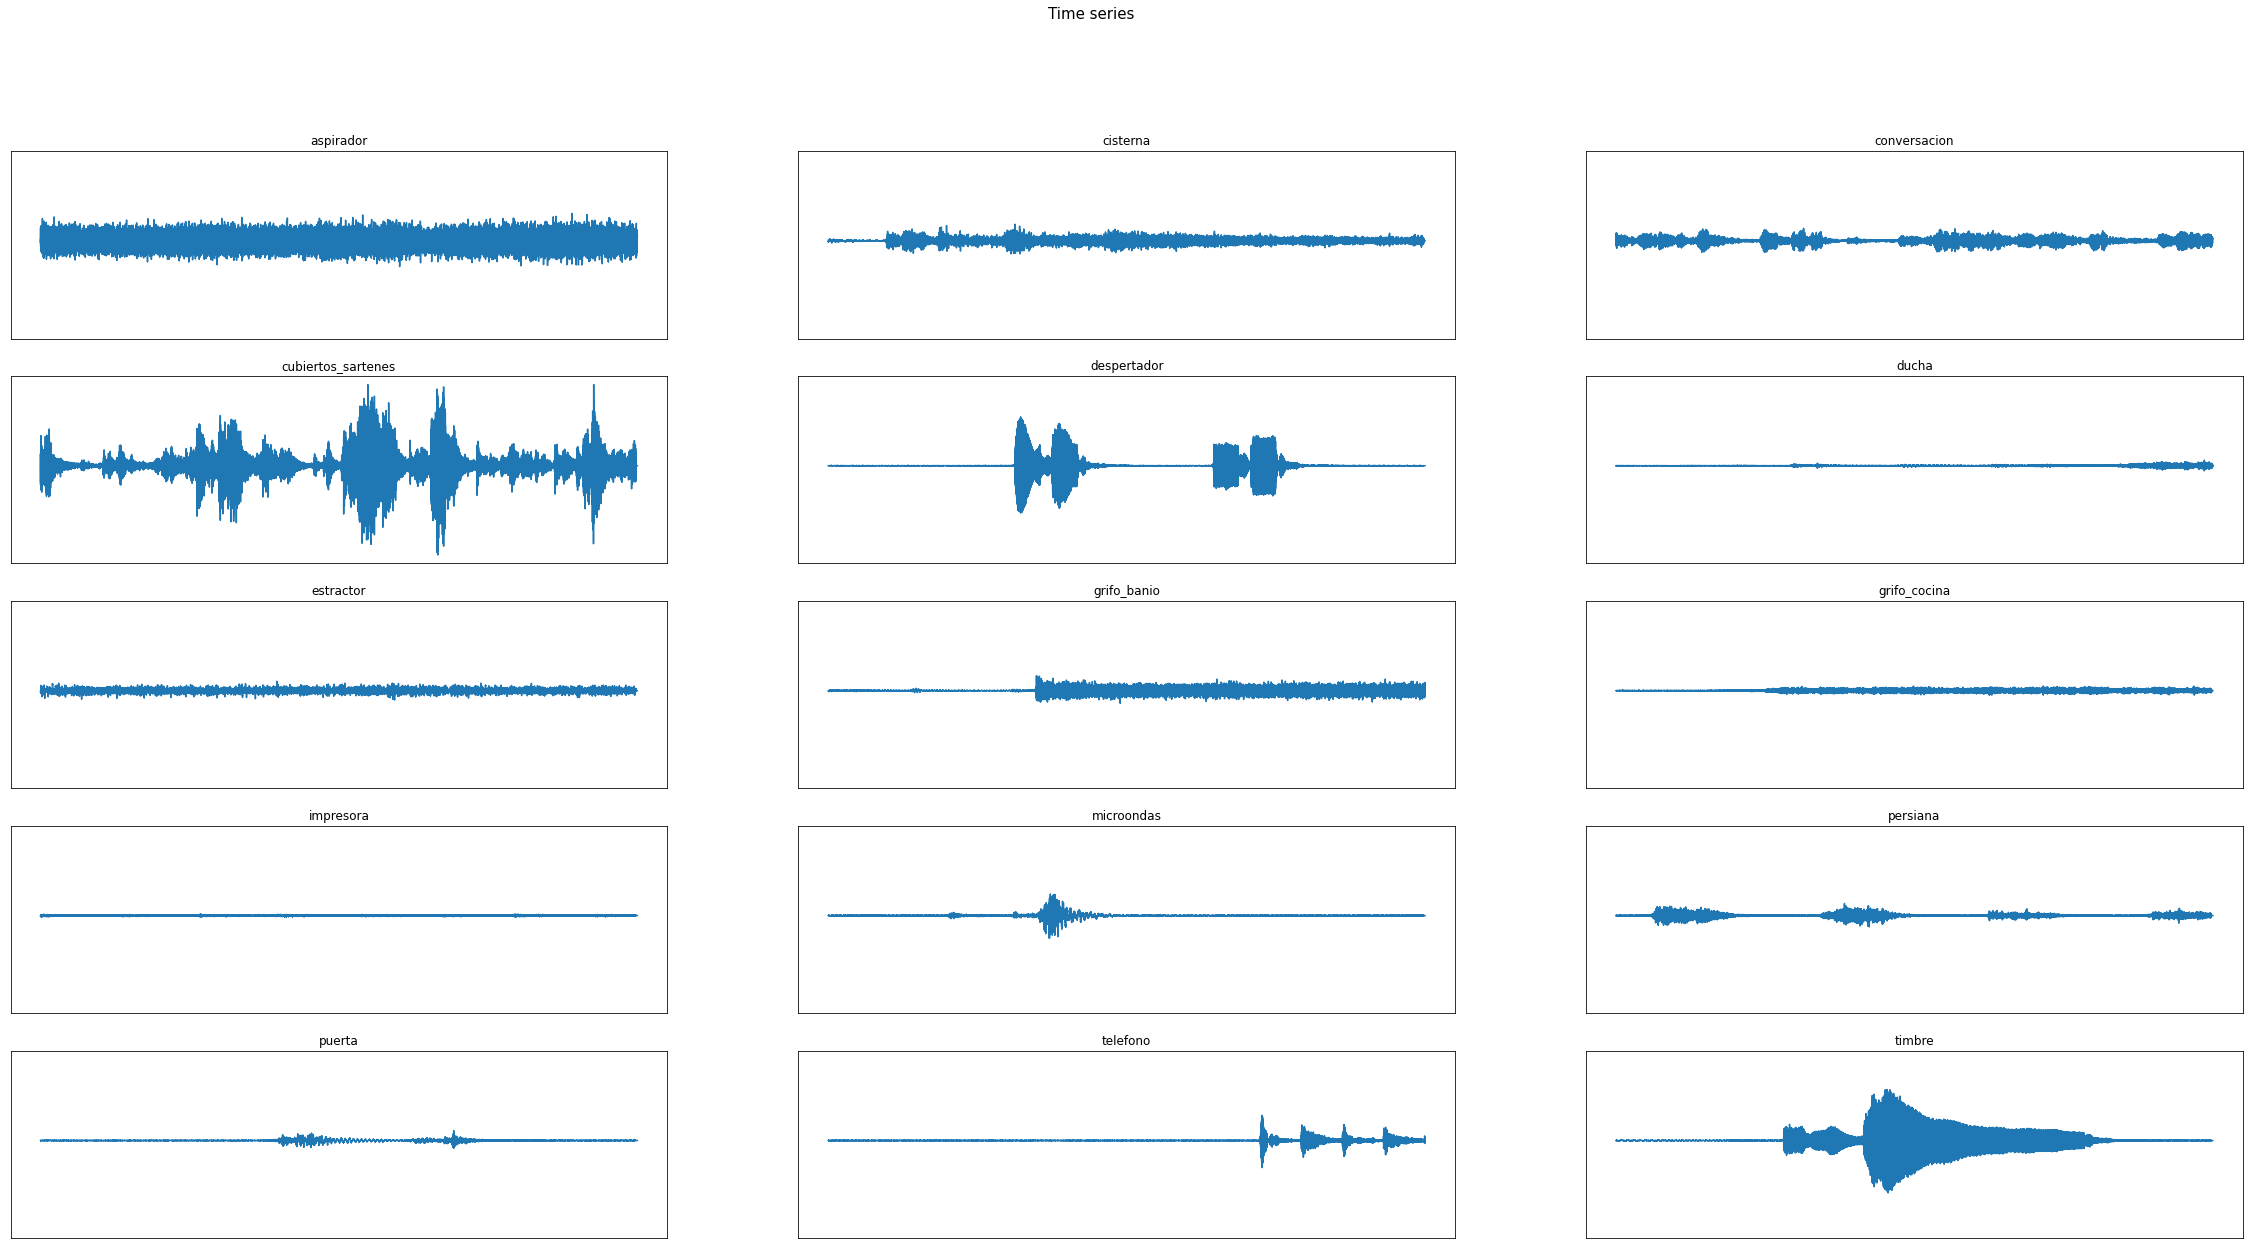

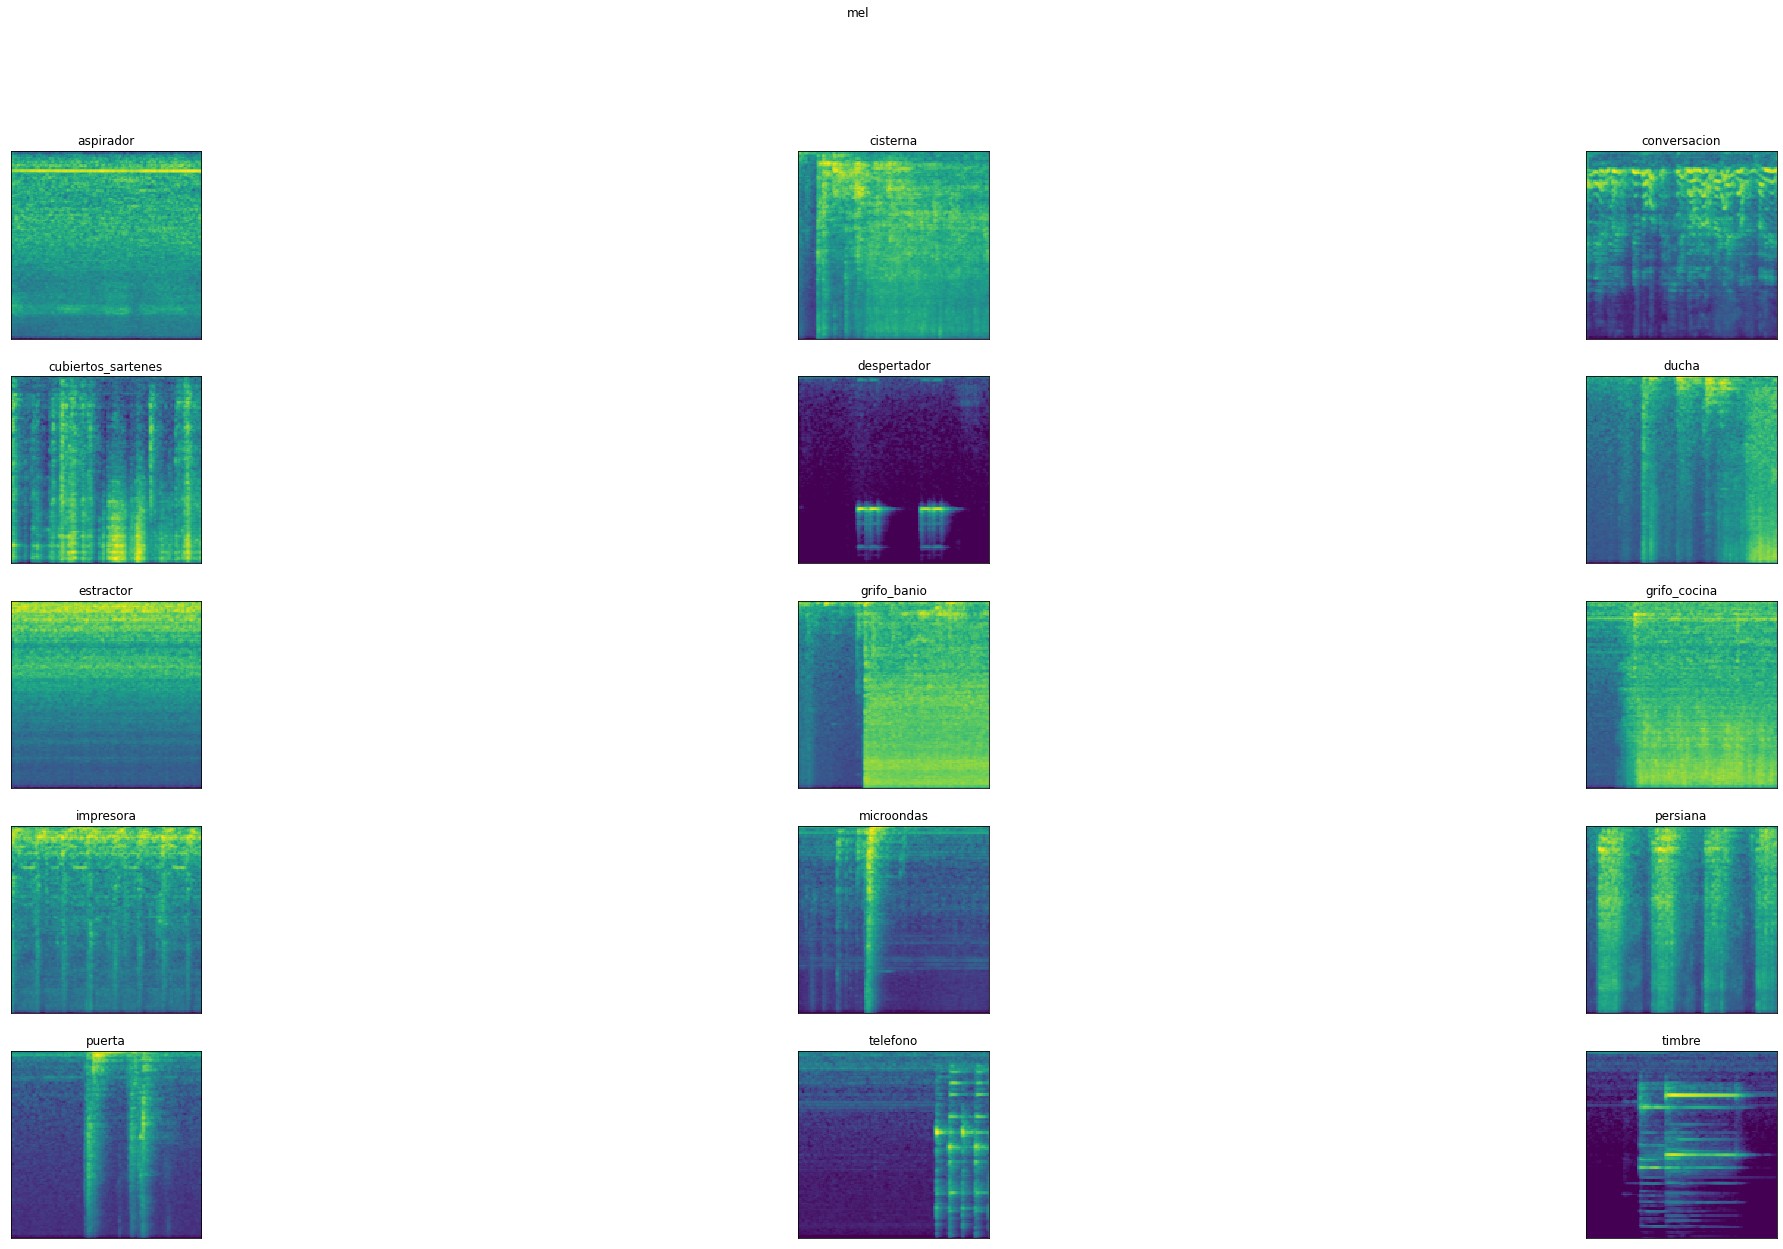

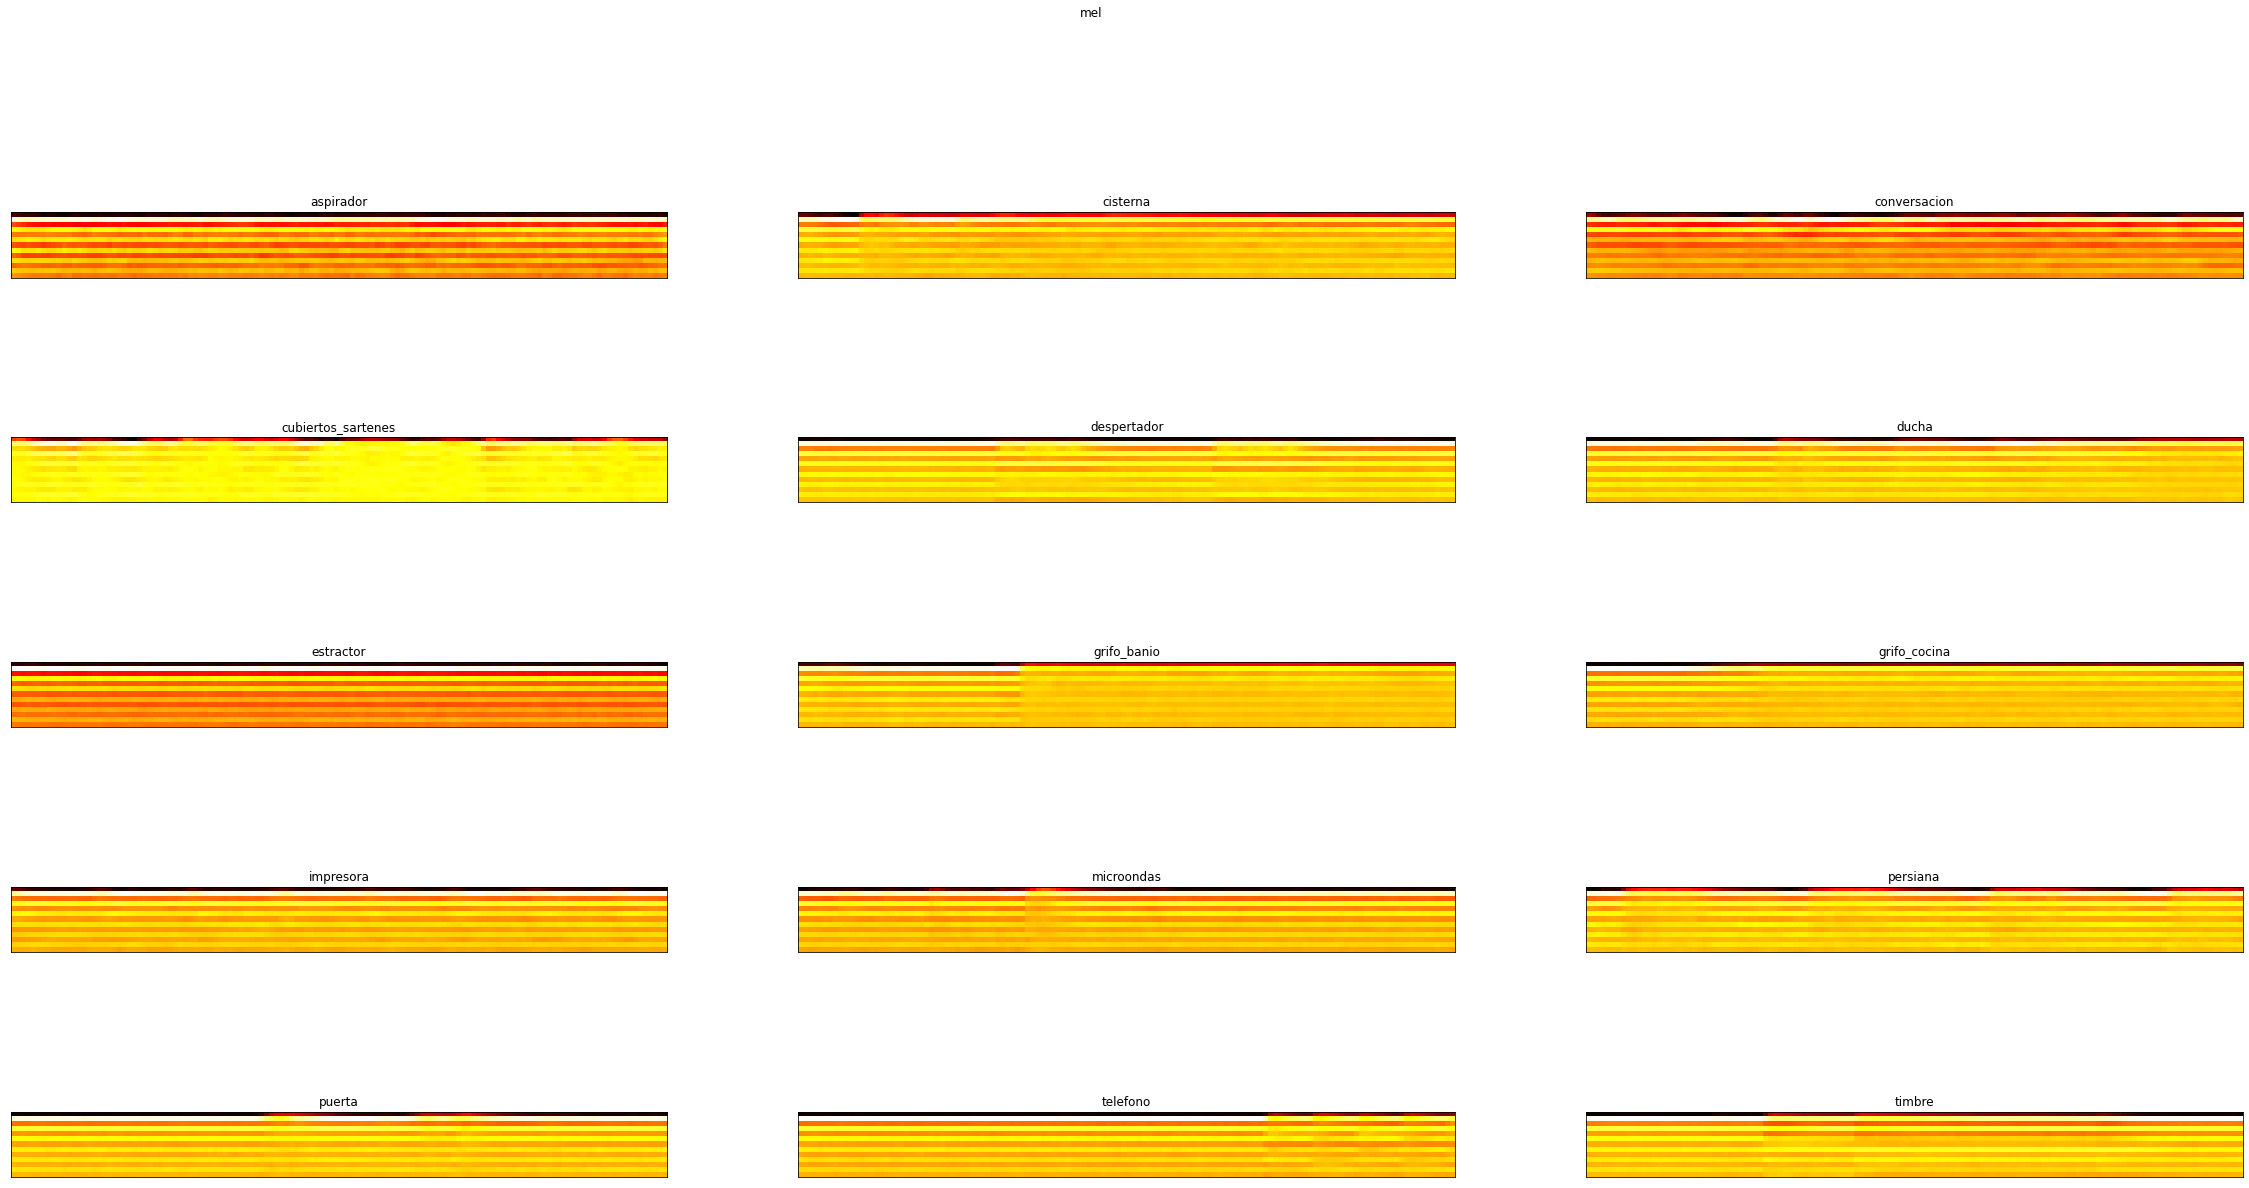

In [5]:
signals = {}
mel_spectrograms = {}
mfccs = {}

for row in tqdm(sample_df.iterrows()):  # every row will be like [[index], [filename , target , category]]
    signal , rate = librosa.load(DATA_PATH+ row[1][0])
    len(signal)
    signals[row[1][2]] = signal    # row[1][2] will be the category of that signal. eg. signal["dog"] = signal of dog sound
    #rate
    
    mel_spec = librosa.feature.melspectrogram(y=signal , sr=rate ,  n_fft=2048, hop_length=512)
    mel_spec = librosa.power_to_db(mel_spec, ref=np.max)  #visualizing mel_spectrogram directly gives black image. So, coverting from power_to_db is required
    mel_spectrograms[row[1][2]] = mel_spec
    
    mfcc = librosa.feature.mfcc(signal , rate , n_mfcc=13, dct_type=3)
    mfcc2 = np.array(mel_spec)
    mfcc2.shape
    mfccs[row[1][2]] = mfcc
    
def dis_feature(mfccs, cmap=None):
    """
    this function will take the mfcc/mel_spectrogram dictionary and plot the signals
    """
    fig ,axes= plt.subplots(nrows=5 , ncols=3 , sharex=False, sharey=True , figsize=(40,20))
    fig.suptitle('mel')
    i=0
    for x in range(5):
        for y in range(3):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i], cmap=cmap,interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i+=1
            
def plot_signal(signal):
    """
    this function will take the signal dictionary and plot the signals
    """
    fig , axes = plt.subplots(nrows=5 , ncols=3 , sharex =False ,sharey=True,
                             figsize=(40,20))
    fig.suptitle('Time series',size=15)
    i=0
    for x in range(5):
        for y in range(3):
            axes[x,y].set_title(list(signal.keys())[i])
            axes[x,y].plot(list(signal.values())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1

plot_signal(signals)
dis_feature(mel_spectrograms)
dis_feature(mfccs, cmap='hot')

In [6]:
X , y = [] , []
for data in tqdm(df.iterrows()):
  data  
  sig , sr = librosa.load(DATA_PATH+data[1][0])
  sr
  #mfcc_ = librosa.feature.mfcc(sig , sr=sr, n_mfcc=13)
  mel_spec_ = librosa.feature.melspectrogram(y=sig , sr=sr ,  n_fft=2048, hop_length=512)
  mel_spec_ = librosa.power_to_db(mel_spec_, ref=np.max)  #visualizing mel_spectrogram directly gives black image. So, coverting from power_to_db is required
    
  X.append(mel_spec_)
  y.append(data[1][1])

# convert list to numpy array
X = np.array(X) 
y = np.array(y)

#one-hot encoding the target
y = tf.keras.utils.to_categorical(y-1 , num_classes=15)

# our tensorflow model takes input as (no_of_sample , height , width , channel).
# here X has dimension (no_of_sample , height , width).
# So, the below code will reshape it to (no_of_sample , height , width , 1).
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
X.shape
y.shape

0it [00:00, ?it/s]

(0,
 name        aspirador1.wav
 target                   1
 category         aspirador
 Name: 0, dtype: object)

22050

1it [00:00,  9.34it/s]

(1,
 name        aspirador2.wav
 target                   1
 category         aspirador
 Name: 1, dtype: object)

22050

(2,
 name        aspirador3.wav
 target                   1
 category         aspirador
 Name: 2, dtype: object)

22050

3it [00:00,  9.88it/s]

(3,
 name        aspirador4.wav
 target                   1
 category         aspirador
 Name: 3, dtype: object)

22050

4it [00:00,  9.69it/s]

(4,
 name        aspirador5.wav
 target                   1
 category         aspirador
 Name: 4, dtype: object)

22050

5it [00:00,  9.69it/s]

(5,
 name        aspirador6.wav
 target                   1
 category         aspirador
 Name: 5, dtype: object)

22050

6it [00:00,  9.71it/s]

(6,
 name        aspirador7.wav
 target                   1
 category         aspirador
 Name: 6, dtype: object)

22050

7it [00:00,  9.77it/s]

(7,
 name        aspirador8.wav
 target                   1
 category         aspirador
 Name: 7, dtype: object)

22050

(8,
 name        aspirador9.wav
 target                   1
 category         aspirador
 Name: 8, dtype: object)

22050

9it [00:00,  9.94it/s]

(9,
 name        aspirador10.wav
 target                    1
 category          aspirador
 Name: 9, dtype: object)

22050

(10,
 name        aspirador11.wav
 target                    1
 category          aspirador
 Name: 10, dtype: object)

22050

11it [00:01,  9.86it/s]

(11,
 name        aspirador12.wav
 target                    1
 category          aspirador
 Name: 11, dtype: object)

22050

12it [00:01,  9.78it/s]

(12,
 name        aspirador13.wav
 target                    1
 category          aspirador
 Name: 12, dtype: object)

22050

13it [00:01,  9.84it/s]

(13,
 name        aspirador14.wav
 target                    1
 category          aspirador
 Name: 13, dtype: object)

22050

14it [00:01,  9.78it/s]

(14,
 name        aspirador15.wav
 target                    1
 category          aspirador
 Name: 14, dtype: object)

22050

15it [00:01,  9.80it/s]

(15,
 name        aspirador16.wav
 target                    1
 category          aspirador
 Name: 15, dtype: object)

22050

16it [00:01,  9.77it/s]

(16,
 name        aspirador17.wav
 target                    1
 category          aspirador
 Name: 16, dtype: object)

22050

(17,
 name        aspirador18.wav
 target                    1
 category          aspirador
 Name: 17, dtype: object)

22050

18it [00:01, 10.06it/s]

(18,
 name        aspirador19.wav
 target                    1
 category          aspirador
 Name: 18, dtype: object)

22050

19it [00:01,  9.69it/s]

(19,
 name        aspirador20.wav
 target                    1
 category          aspirador
 Name: 19, dtype: object)

22050

20it [00:02,  9.63it/s]

(20,
 name        aspirador21.wav
 target                    1
 category          aspirador
 Name: 20, dtype: object)

22050

21it [00:02,  9.65it/s]

(21,
 name        aspirador22.wav
 target                    1
 category          aspirador
 Name: 21, dtype: object)

22050

22it [00:02,  9.55it/s]

(22,
 name        aspirador23.wav
 target                    1
 category          aspirador
 Name: 22, dtype: object)

22050

23it [00:02,  9.36it/s]

(23,
 name        aspirador24.wav
 target                    1
 category          aspirador
 Name: 23, dtype: object)

22050

24it [00:02,  9.31it/s]

(24,
 name        aspirador25.wav
 target                    1
 category          aspirador
 Name: 24, dtype: object)

22050

25it [00:02,  9.37it/s]

(25,
 name        aspirador26.wav
 target                    1
 category          aspirador
 Name: 25, dtype: object)

22050

26it [00:02,  9.30it/s]

(26,
 name        aspirador27.wav
 target                    1
 category          aspirador
 Name: 26, dtype: object)

22050

27it [00:02,  9.16it/s]

(27,
 name        aspirador28.wav
 target                    1
 category          aspirador
 Name: 27, dtype: object)

22050

(28,
 name        aspirador29.wav
 target                    1
 category          aspirador
 Name: 28, dtype: object)

22050

29it [00:02,  9.79it/s]

(29,
 name        aspirador30.wav
 target                    1
 category          aspirador
 Name: 29, dtype: object)

22050

(30,
 name        aspirador31.wav
 target                    1
 category          aspirador
 Name: 30, dtype: object)

22050

31it [00:03,  9.87it/s]

(31,
 name        aspirador32.wav
 target                    1
 category          aspirador
 Name: 31, dtype: object)

22050

32it [00:03,  9.83it/s]

(32,
 name        aspirador33.wav
 target                    1
 category          aspirador
 Name: 32, dtype: object)

22050

33it [00:03,  9.65it/s]

(33,
 name        aspirador34.wav
 target                    1
 category          aspirador
 Name: 33, dtype: object)

22050

34it [00:03,  9.57it/s]

(34,
 name        aspirador35.wav
 target                    1
 category          aspirador
 Name: 34, dtype: object)

22050

35it [00:03,  9.53it/s]

(35,
 name        aspirador36.wav
 target                    1
 category          aspirador
 Name: 35, dtype: object)

22050

36it [00:03,  9.55it/s]

(36,
 name        aspirador37.wav
 target                    1
 category          aspirador
 Name: 36, dtype: object)

22050

(37,
 name        aspirador38.wav
 target                    1
 category          aspirador
 Name: 37, dtype: object)

22050

38it [00:03,  9.81it/s]

(38,
 name        aspirador39.wav
 target                    1
 category          aspirador
 Name: 38, dtype: object)

22050

39it [00:04,  9.72it/s]

(39,
 name        aspirador40.wav
 target                    1
 category          aspirador
 Name: 39, dtype: object)

22050

(40,
 name        aspirador41.wav
 target                    1
 category          aspirador
 Name: 40, dtype: object)

22050

41it [00:04,  9.56it/s]

(41,
 name        aspirador42.wav
 target                    1
 category          aspirador
 Name: 41, dtype: object)

22050

42it [00:04,  9.53it/s]

(42,
 name        aspirador43.wav
 target                    1
 category          aspirador
 Name: 42, dtype: object)

22050

(43,
 name        aspirador44.wav
 target                    1
 category          aspirador
 Name: 43, dtype: object)

22050

44it [00:04,  9.94it/s]

(44,
 name        aspirador45.wav
 target                    1
 category          aspirador
 Name: 44, dtype: object)

22050

(45,
 name        aspirador46.wav
 target                    1
 category          aspirador
 Name: 45, dtype: object)

22050

46it [00:04, 10.20it/s]

(46,
 name        aspirador47.wav
 target                    1
 category          aspirador
 Name: 46, dtype: object)

22050

(47,
 name        aspirador48.wav
 target                    1
 category          aspirador
 Name: 47, dtype: object)

22050

48it [00:04,  9.88it/s]

(48,
 name        aspirador49.wav
 target                    1
 category          aspirador
 Name: 48, dtype: object)

22050

(49,
 name        aspirador50.wav
 target                    1
 category          aspirador
 Name: 49, dtype: object)

22050

50it [00:05, 10.07it/s]

(50,
 name        aspirador51.wav
 target                    1
 category          aspirador
 Name: 50, dtype: object)

22050

(51,
 name        aspirador52.wav
 target                    1
 category          aspirador
 Name: 51, dtype: object)

22050

52it [00:05, 10.06it/s]

(52,
 name        aspirador53.wav
 target                    1
 category          aspirador
 Name: 52, dtype: object)

22050

(53,
 name        aspirador54.wav
 target                    1
 category          aspirador
 Name: 53, dtype: object)

22050

54it [00:05,  9.55it/s]

(54,
 name        aspirador55.wav
 target                    1
 category          aspirador
 Name: 54, dtype: object)

22050

55it [00:05,  9.50it/s]

(55,
 name        aspirador56.wav
 target                    1
 category          aspirador
 Name: 55, dtype: object)

22050

56it [00:05,  9.39it/s]

(56,
 name        aspirador57.wav
 target                    1
 category          aspirador
 Name: 56, dtype: object)

22050

(57,
 name        aspirador58.wav
 target                    1
 category          aspirador
 Name: 57, dtype: object)

22050

58it [00:05,  9.69it/s]

(58,
 name        aspirador59.wav
 target                    1
 category          aspirador
 Name: 58, dtype: object)

22050

(59,
 name        aspirador60.wav
 target                    1
 category          aspirador
 Name: 59, dtype: object)

22050

60it [00:06,  9.73it/s]

(60,
 name        aspirador61.wav
 target                    1
 category          aspirador
 Name: 60, dtype: object)

22050

61it [00:06,  9.75it/s]

(61,
 name        aspirador62.wav
 target                    1
 category          aspirador
 Name: 61, dtype: object)

22050

(62,
 name        aspirador63.wav
 target                    1
 category          aspirador
 Name: 62, dtype: object)

22050

63it [00:06,  9.95it/s]

(63,
 name        aspirador64.wav
 target                    1
 category          aspirador
 Name: 63, dtype: object)

22050

(64,
 name        aspirador65.wav
 target                    1
 category          aspirador
 Name: 64, dtype: object)

22050

65it [00:06,  9.93it/s]

(65,
 name        aspirador66.wav
 target                    1
 category          aspirador
 Name: 65, dtype: object)

22050

66it [00:06,  9.76it/s]

(66,
 name        aspirador67.wav
 target                    1
 category          aspirador
 Name: 66, dtype: object)

22050

67it [00:06,  9.64it/s]

(67,
 name        aspirador68.wav
 target                    1
 category          aspirador
 Name: 67, dtype: object)

22050

68it [00:07,  9.46it/s]

(68,
 name        aspirador69.wav
 target                    1
 category          aspirador
 Name: 68, dtype: object)

22050

(69,
 name        aspirador70.wav
 target                    1
 category          aspirador
 Name: 69, dtype: object)

69it [00:07,  9.58it/s]


KeyboardInterrupt: 

In [ ]:

x_train , x_val , y_train , y_val = train_test_split(X , y ,test_size=0.2, random_state=2020)

INPUTSHAPE = (128,130,1)
NUM_CLASSES=15

model =  models.Sequential([
                          layers.Conv2D(16 , (2,2),activation = 'relu',padding='valid', input_shape = INPUTSHAPE),
                          layers.MaxPooling2D((2,2)),
                          
                          layers.Conv2D(32, (2,2), activation='relu',padding='valid'),
                          layers.MaxPooling2D((2,2)),
                          
                          layers.Conv2D(64, (2,2), activation='relu',padding='valid'),
                          layers.MaxPooling2D((2,2)),
                          
                          layers.Conv2D(128, (2,2), activation='relu',padding='valid'),
                          layers.Conv2D(128, (2,2), activation='relu',padding='valid'),
                          #layers.MaxPooling2D((2,2)),
                          
                          layers.Flatten(),


                          layers.Dense(1024 , activation = 'relu'),
                          layers.Dense(1024 , activation = 'relu'),
    
                          layers.Dense(NUM_CLASSES , activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'acc')

model.summary()


In [ ]:
LOGDIR = "logs"
CPKT = "cpkt/"

#this callback is used to prevent overfitting.
callback_1 = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False
)

#this checkpoint saves the best weights of model at every epoch
callback_2 = tf.keras.callbacks.ModelCheckpoint(
    CPKT, monitor='val_loss', verbose=0, save_best_only=True,
    save_weights_only=True, mode='auto', save_freq='epoch', options=None
)

#this is for tensorboard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=LOGDIR)


history = model.fit(x_train,y_train ,
            validation_data=(x_val,y_val),
            epochs=40)
# Guardar el Modelo
model.save('my_model.h5')



In [ ]:
#Confution Matrix

y_pred = np.argmax(model.predict(x_val),axis=1)
print('Confusion Matrix')
confusionMatrix = confusion_matrix(y_pred, np.argmax(y_val,axis=1))
print(confusionMatrix)

In [ ]:
#------------------------CROSS VALIDATION------------------------
# Merge inputs and targets
inputs = X 
targets = y
# Define the K-fold Cross Validator
kfold = KFold(n_splits=10, shuffle=True) #division por 10
# K-fold Cross Validation model evaluation
fold_no = 1
acc_per_fold = []
loss_per_fold = []
confusionMatrix =[]
no_epochs = 40 
ytest_metrics=[]
ypred_metrics=[]

for train, test in kfold.split(inputs, targets):

    model =  models.Sequential([
                          layers.Conv2D(16 , (2,2),activation = 'relu',padding='valid', input_shape = INPUTSHAPE),
                          layers.MaxPooling2D((2,2)),
                          
                          layers.Conv2D(32, (2,2), activation='relu',padding='valid'),
                          layers.MaxPooling2D((2,2)),
                          
                          layers.Conv2D(64, (2,2), activation='relu',padding='valid'),
                          layers.MaxPooling2D((2,2)),
                          
                          layers.Conv2D(128, (2,2), activation='relu',padding='valid'),
                          layers.Conv2D(128, (2,2), activation='relu',padding='valid'),
                          #layers.MaxPooling2D((2,2)),
                          
                          layers.Flatten(),


                          layers.Dense(1024 , activation = 'relu'),
                          layers.Dense(1024 , activation = 'relu'),
    
                          layers.Dense(NUM_CLASSES , activation = 'softmax')
    ])

    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'acc')


    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(inputs[train],targets[train] ,
            validation_data=(inputs[test],targets[test]),
            epochs=no_epochs)
    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    #Confution Matrix
    targets_pred = np.argmax(model.predict(inputs[test]),axis=1)
    confusionMatrix.append(confusion_matrix(targets_pred, np.argmax(targets[test],axis=1)))
    ytest_metrics.extend(np.argmax(targets[test],axis=1))
    ypred_metrics.extend(targets_pred)
    
    # Increase fold number
    fold_no = fold_no + 1
    
    
#MATRICES DE CONFUSION
#for mtr_conf in confusionMatrix:
#    print(mtr_conf)
    
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

In [ ]:
#Sumar las matrices de confusion y dar una única
matriz_confusion_cross_validation = []
#Inicializamos la matriz resultado (matriz_confusion_croos_validation)
for i in range(len(confusionMatrix[0])):
    matriz_confusion_cross_validation.append([])
    for j in range(len(confusionMatrix[0][i])):
        matriz_confusion_cross_validation[i].append(0)

for matriz in confusionMatrix:
    for i in range(len(matriz)):
        for j in range(len(matriz[i])):
            matriz_confusion_cross_validation[i][j]+=matriz[i][j]
#   print("---------------------------------------")
matriz_confusion_cross_validation
sumaDiagonal = 0
sumaTotal = 0
ficheroCSV ="aspirador,cisterna,conversacion,cubiertos_sartenes,despertador,ducha,estractor,grifo_banio,grifo_cocina,impresora,microondas,persiana,puerta,telefono,timbre\n"
for i in range(len(matriz_confusion_cross_validation)):
    for j in range(len(matriz_confusion_cross_validation[i])):
        ficheroCSV+=str(matriz_confusion_cross_validation[i][j])+ ","
        sumaTotal+= matriz_confusion_cross_validation[i][j]
        if (i == j) :
            sumaDiagonal += matriz_confusion_cross_validation[i][j]
    ficheroCSV+='\n'
print("Num elementos:",sumaTotal)
print("Suma de la diagonal:",sumaDiagonal)
with open('matriz_confusion_my_model.csv', 'w') as f:
    f.write(ficheroCSV)


In [ ]:
import sounddevice as sd
from scipy.io.wavfile import write
from IPython.display import clear_output
fs = 44100  # Sample rate
seconds = 3  # Duration of recording

new_model = models.load_model('my_model.h5')

def getLabel(i):
    if i==0:
        return "aspirador"
    if i==1:
        return "cisterna"
    if i==2:
        return "conversacion"
    if i==3:
        return "cubiertos_sartenes"
    if i==4:
        return "despertador"
    if i==5:
        return "ducha"
    if i==6:
        return "estractor"
    if i==7:
        return "grifo_banio"
    if i==8:
        return "grifo_cocina"
    if i==9:
        return "impresora"
    if i==10:
        return "microondas"
    if i==11:
        return "persiana"
    if i==12:
        return "puerta"
    if i==13:
        return "telefono"
    return "timbre"

for x in range(40):
    myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
    sd.wait()  # Wait until recording is finished
    write('temp.wav', fs, myrecording)  # Save as WAV file 


    sig_temp , sr = librosa.load('temp.wav')
    mfcc_temp = librosa.feature.mfcc(sig_temp , sr=sr, n_mfcc=13)
    X_temp=[]
    X_temp.append(mfcc_temp)
    X_temp = np.array(X_temp) 
    X_temp = X_temp.reshape(X_temp.shape[0], X_temp.shape[1], X_temp.shape[2], 1)
    Y_temp=new_model.predict(X_temp)
    getLabel(np.argmax(Y_temp))
    

In [ ]:
from sklearn.metrics import classification_report
classification = classification_report(ytest_metrics, ypred_metrics,output_dict=False)
print(classification)

classification = classification_report(ytest_metrics, ypred_metrics,output_dict=True)
dataframe = pd.DataFrame(classification).transpose()
dataframe.to_csv("metrics_OFFLINE_BUENA.csv", index = False)